# Etude de la détection automatique de caractéristiques sur un signal audio
![ISEN Lille](src/isen.jpg)

# Support de tests

Ce Notebook est une version allégée du **Compte-rendu**.
Elle permet d'effectuer rapidement les tests en chargeant directement tous les fichiers nécessaires.

In [294]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
%run -i bin/imports.py
%run -i bin/plot_specamp.py
%run -i bin/plot_specgram.py
%run -i bin/bandpass.py
%run -i bin/gen_filters.py
%run -i bin/plot_freqz.py
%run -i bin/gen_filtered.py
%run -i bin/plot_filtered.py
%run -i bin/energy.py
%run -i bin/energies.py
%run -i bin/plot_energies.py
%run -i bin/gen_data.py
%run -i bin/plot_datagram.py
%run -i bin/plot_data.py
%run -i bin/state_at.py
%run -i bin/compute.py
%run -i bin/compare.py
%run -i bin/live_record.py

In [283]:
%%html
<script>
IPython.OutputArea.prototype._should_scroll = lines => { return false }  
</script>
<style>
.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; }
.ui-resizable { pointer-events:none; }
</style>

# Zone de tests

Toutes les fonctions implémentées sont accessibles dans les cellules ci-dessous.

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


<IPython.core.display.Javascript object>


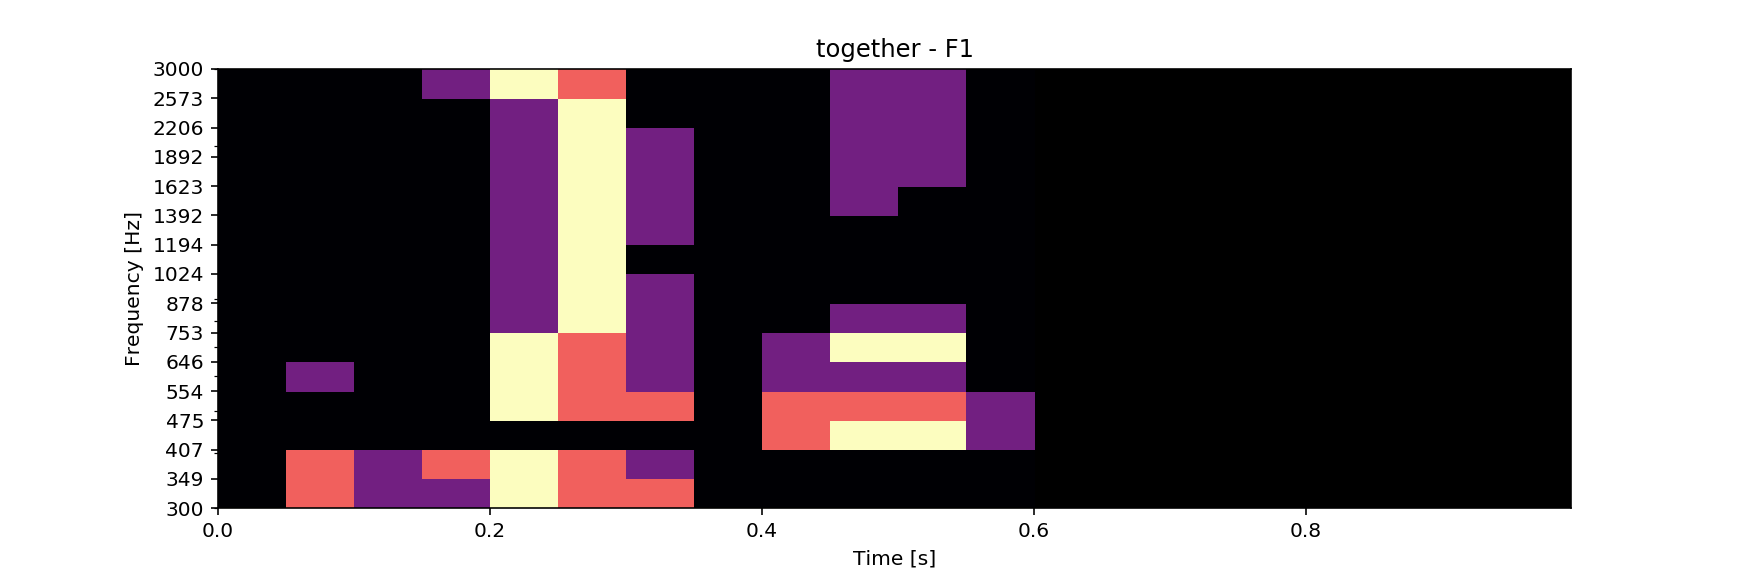

<IPython.core.display.Javascript object>


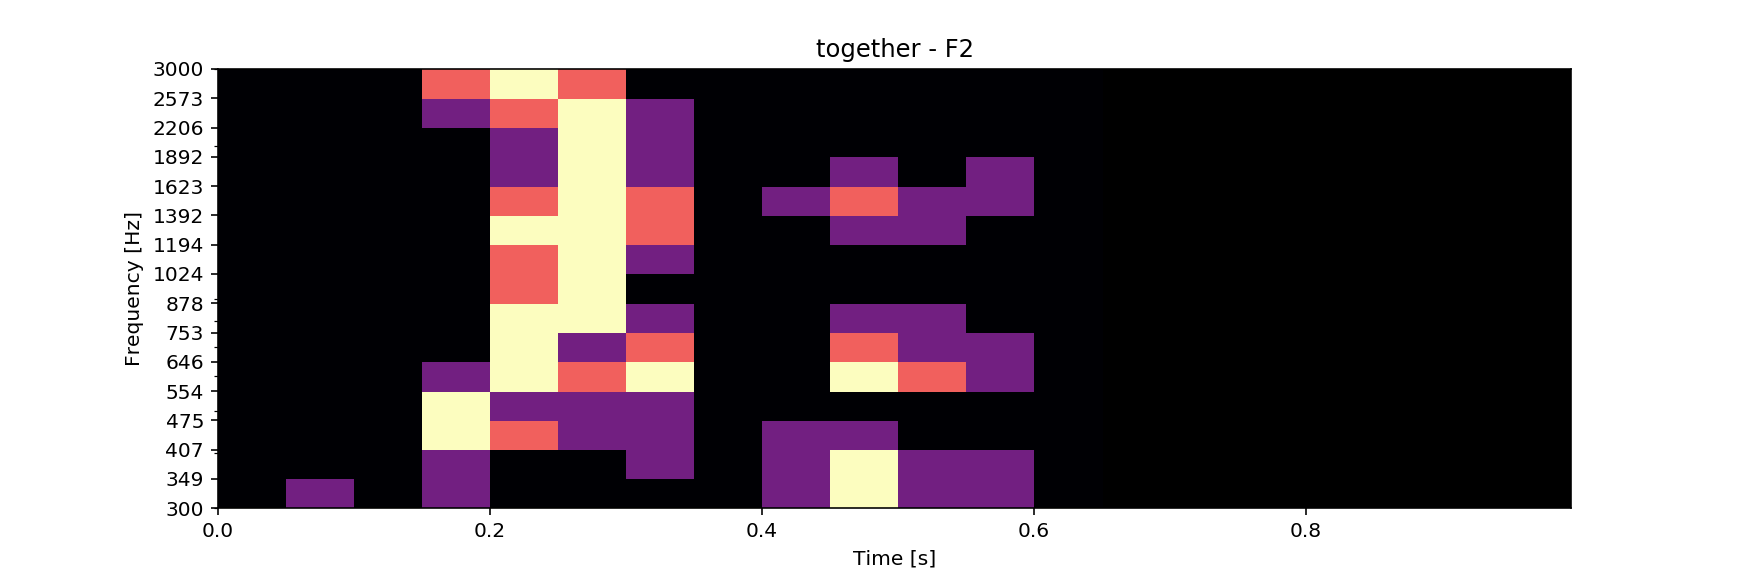

<IPython.core.display.Javascript object>


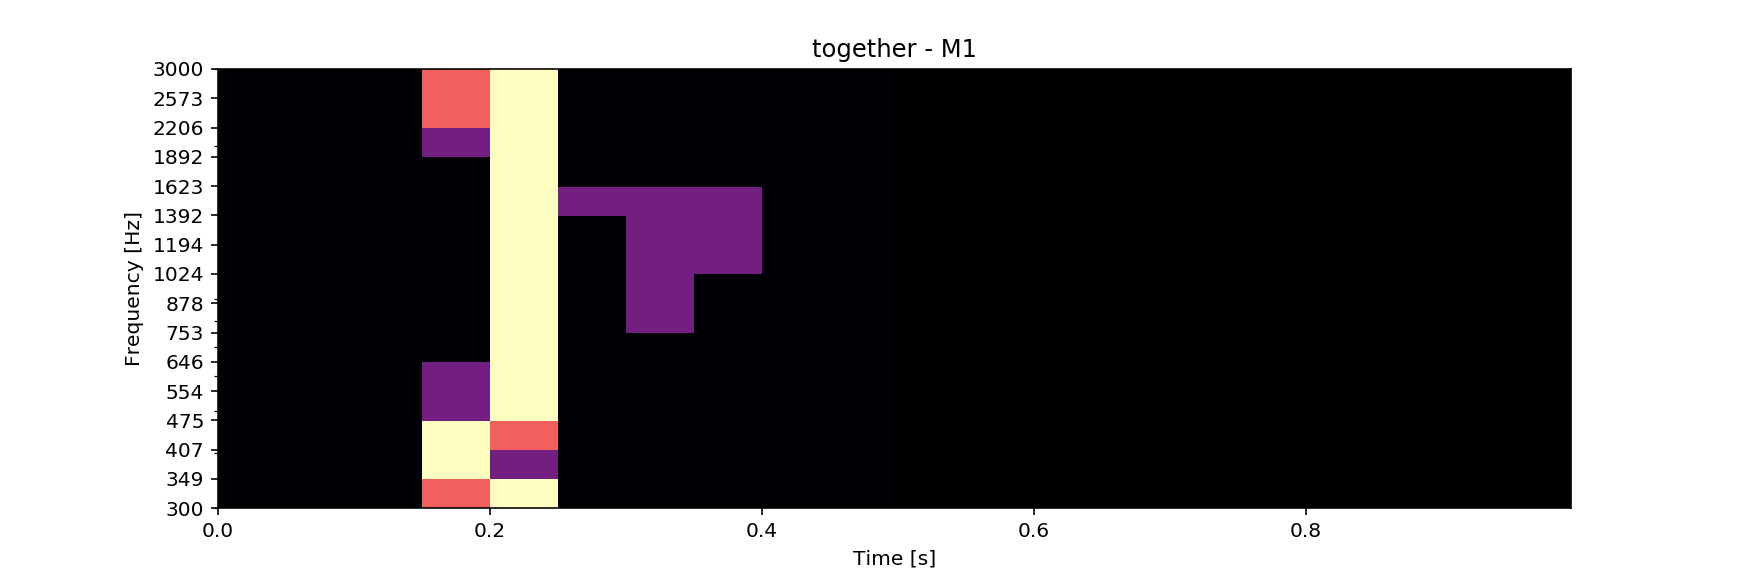

<IPython.core.display.Javascript object>


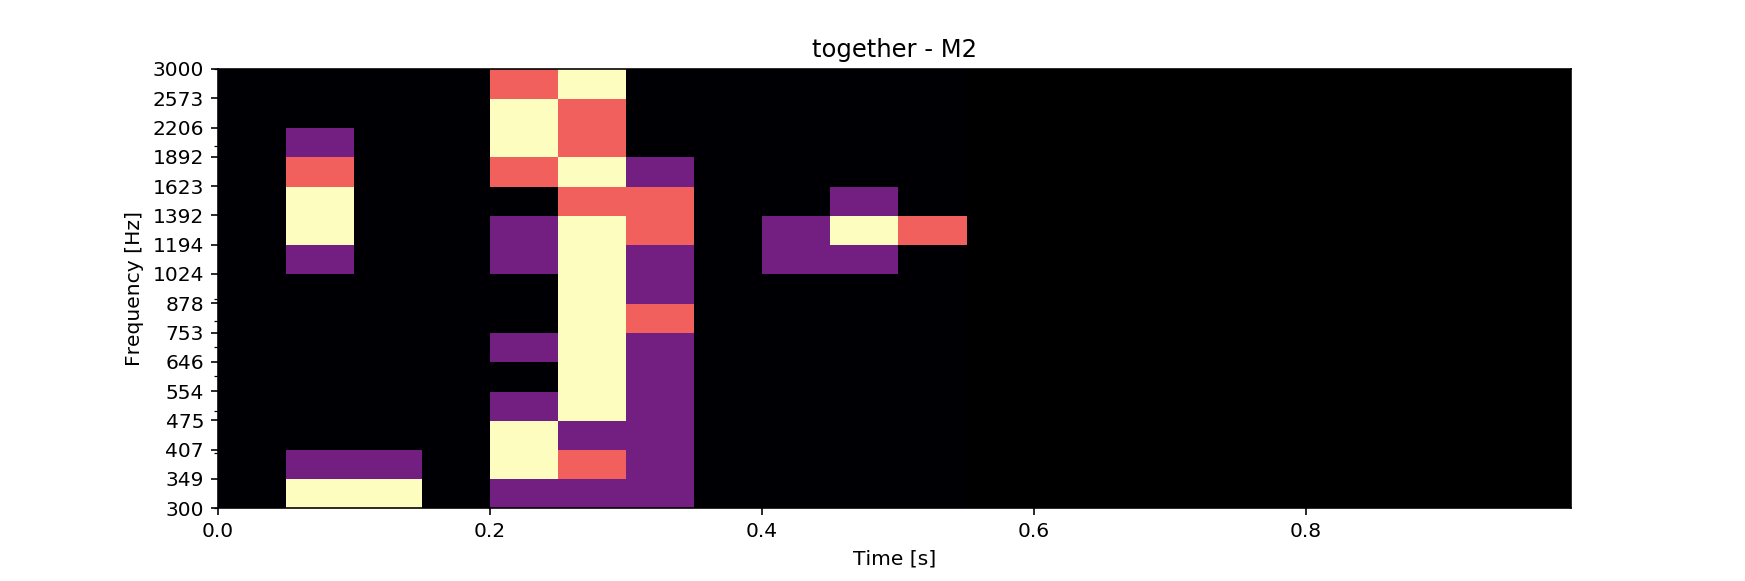

<IPython.core.display.Javascript object>


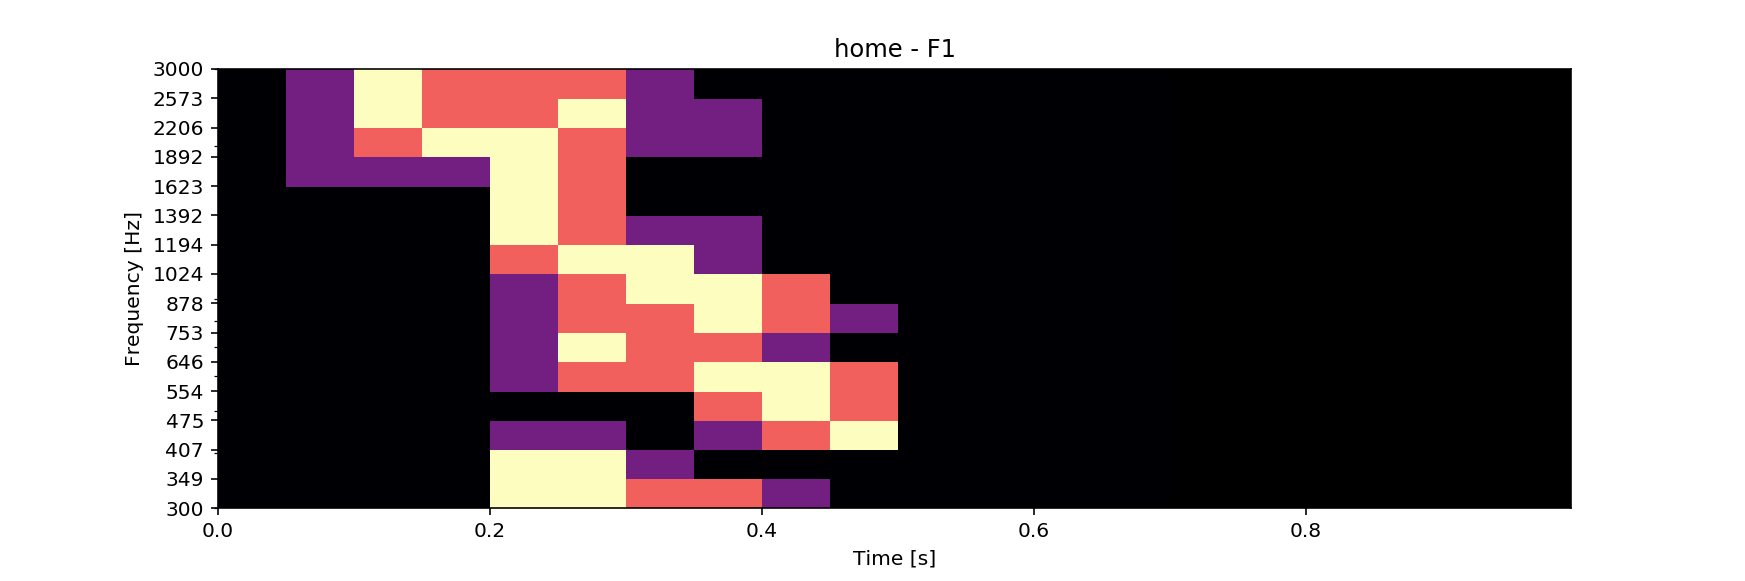

<IPython.core.display.Javascript object>


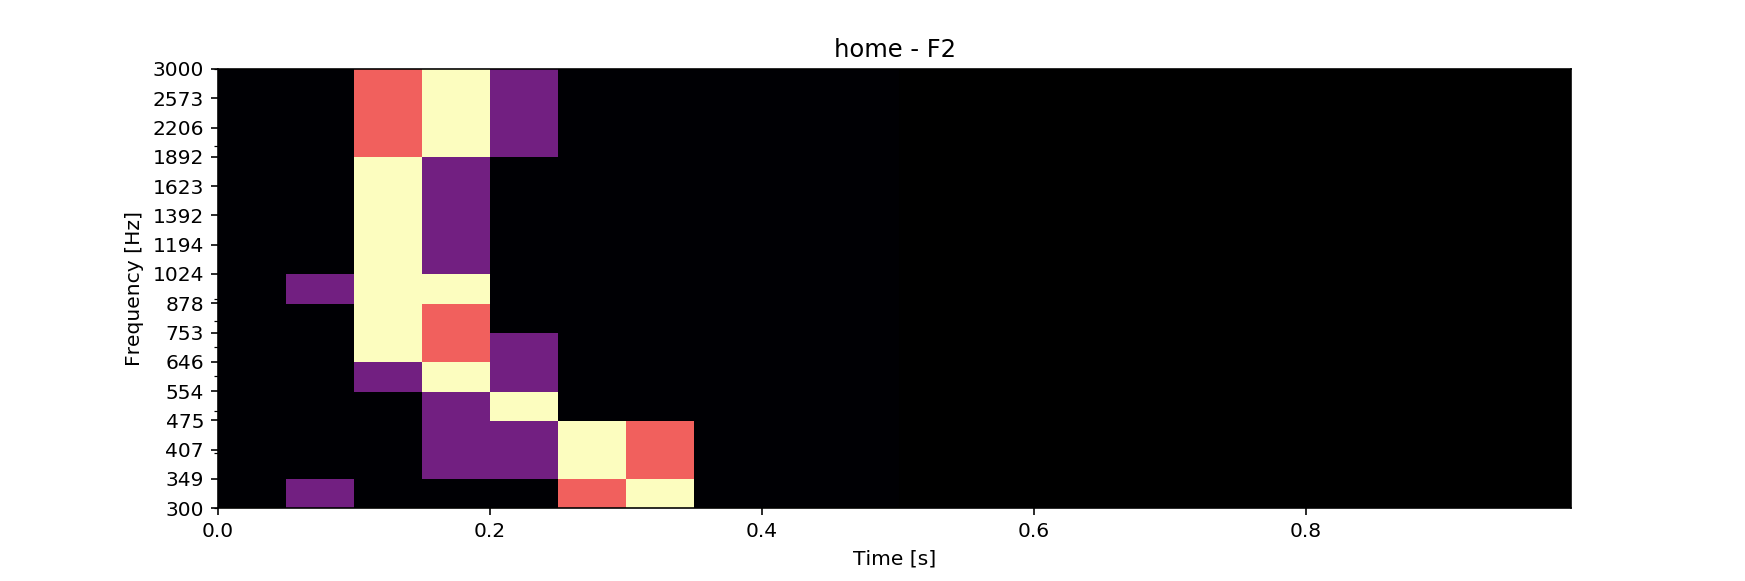

<IPython.core.display.Javascript object>


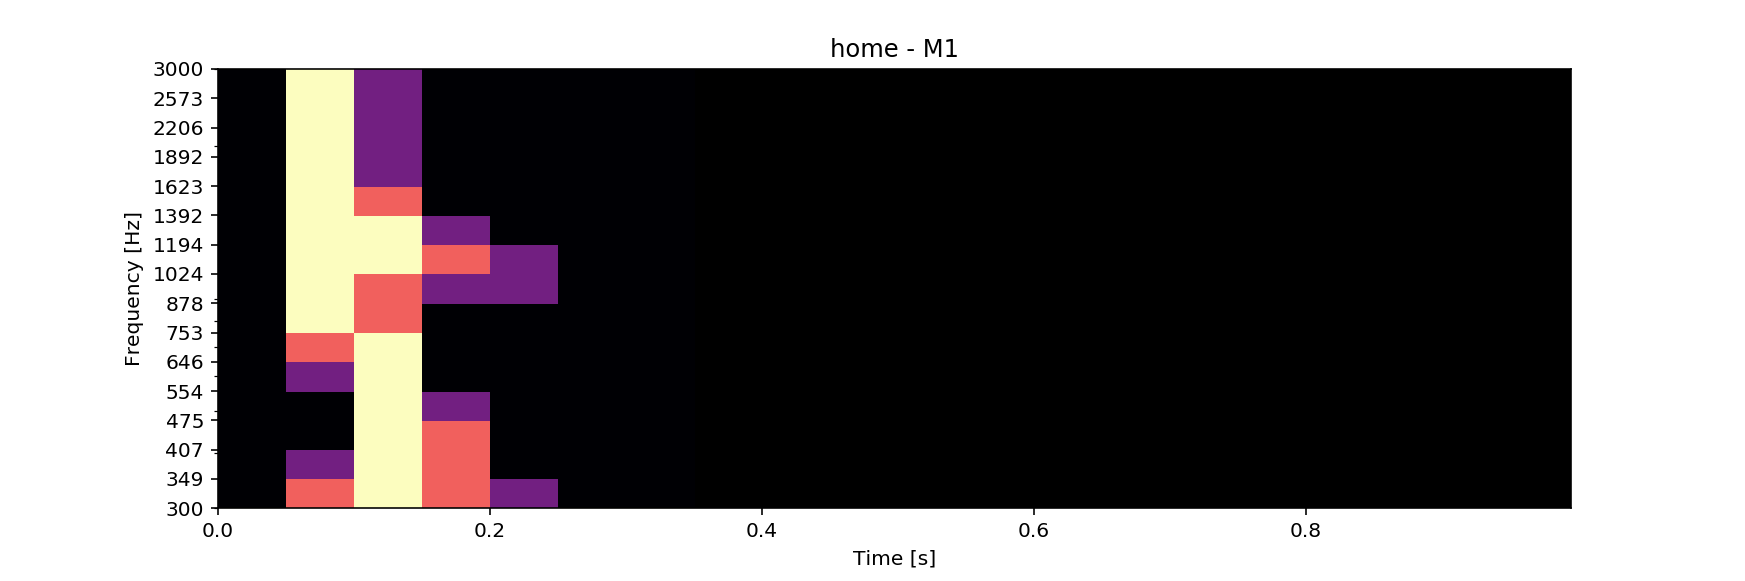

<IPython.core.display.Javascript object>


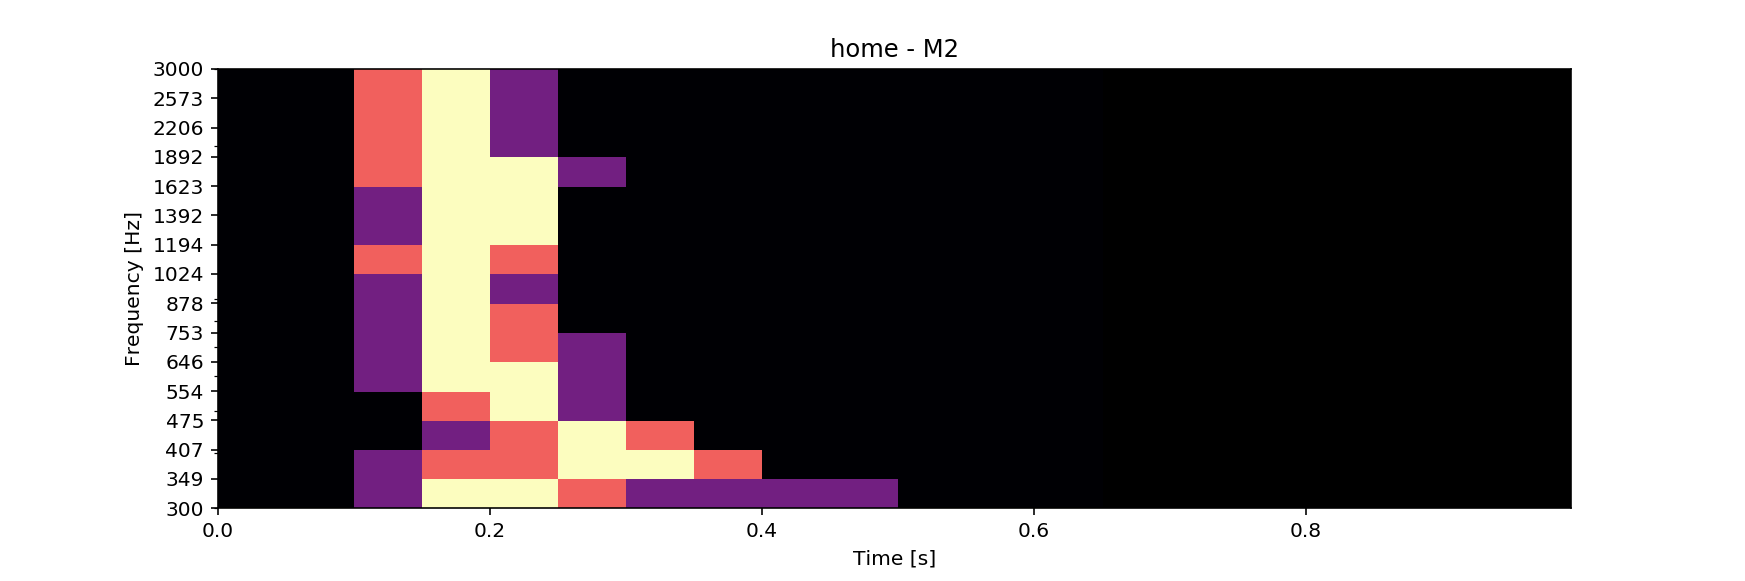

<IPython.core.display.Javascript object>


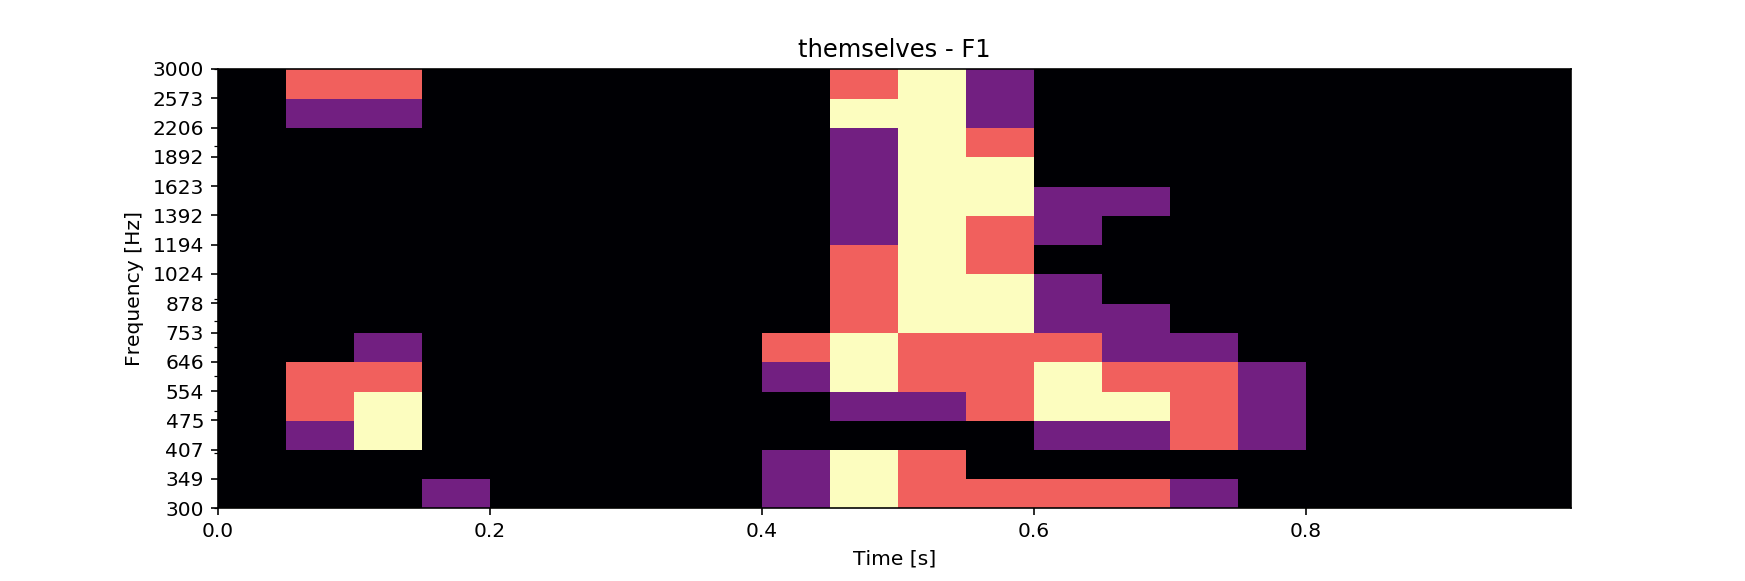

<IPython.core.display.Javascript object>


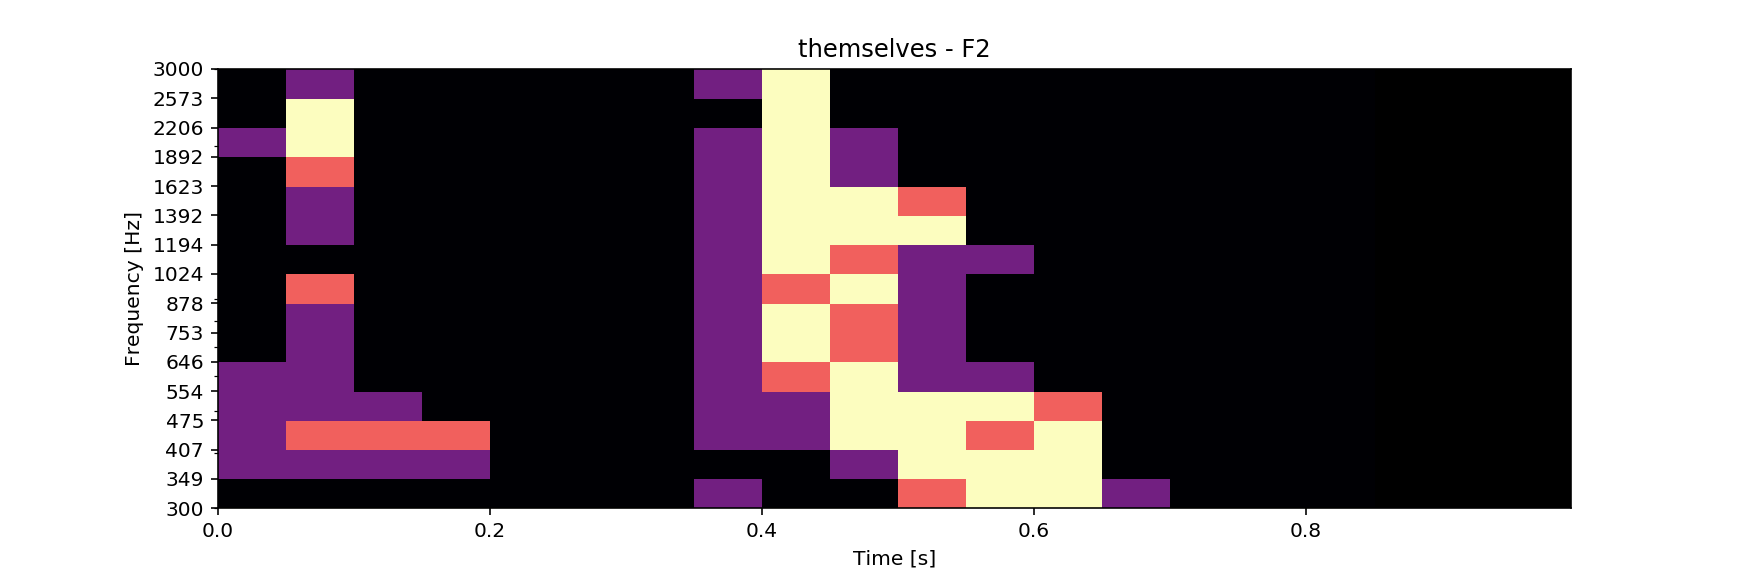

<IPython.core.display.Javascript object>


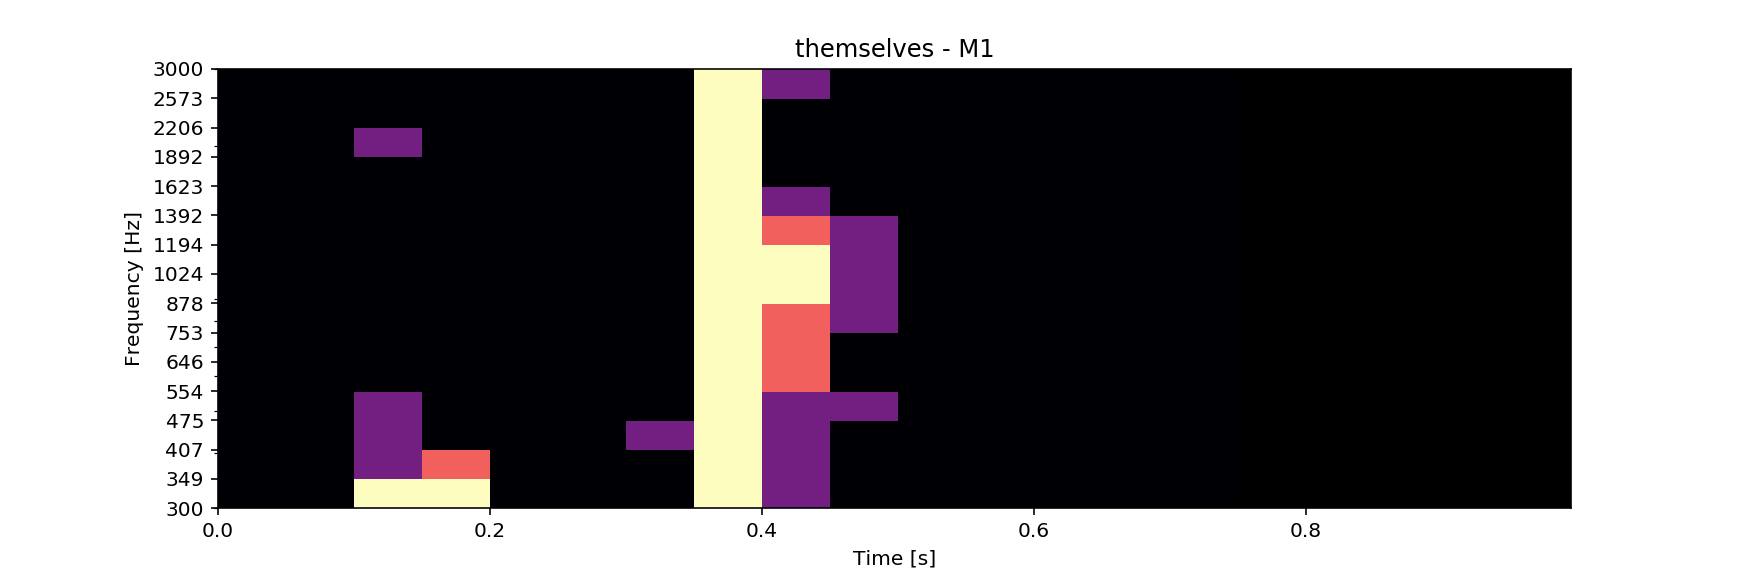

<IPython.core.display.Javascript object>


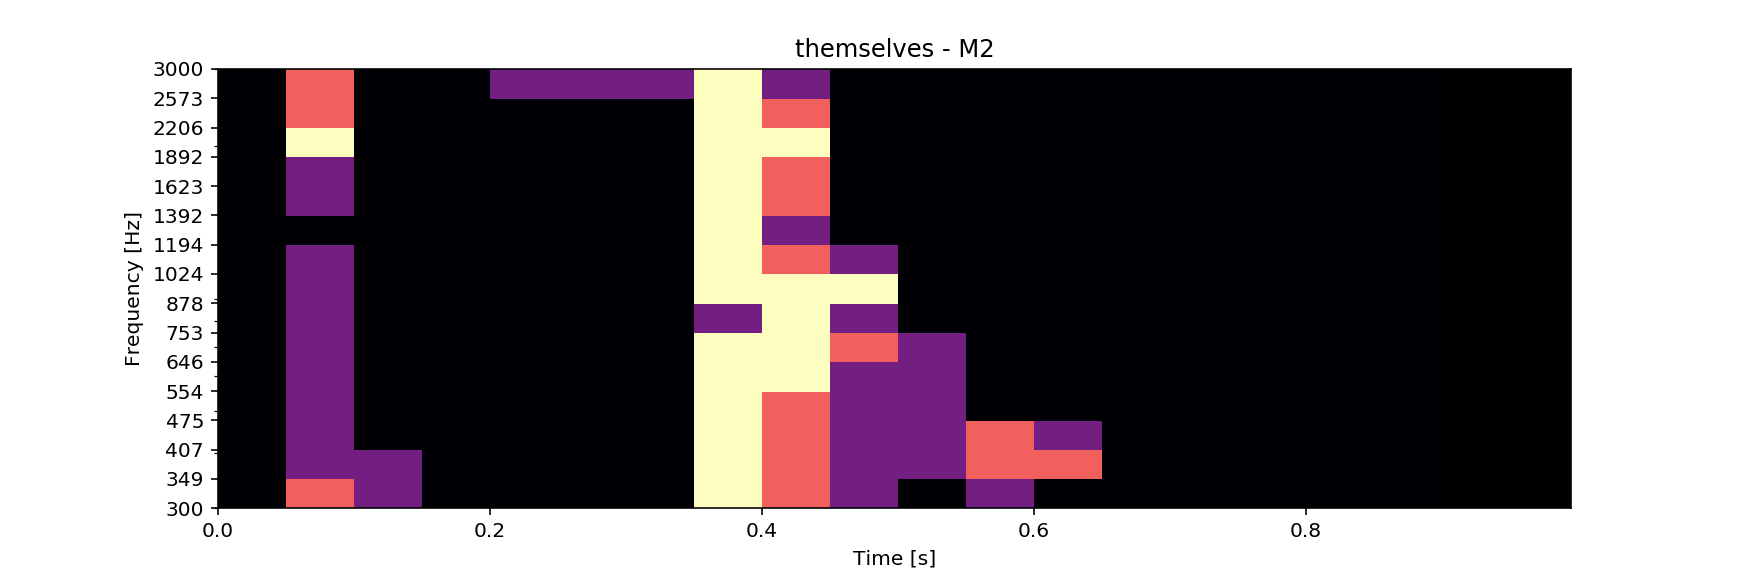

In [374]:
tes = compare(
    compare_format = "src/Words/voice_{person}_{word}_2.wav",
    words=["together", "home", "themselves"], #
    persons=["F1", "F2", "M1", "M2"],
    fmin=300, 
    fmax=3000, 
    nb_filters=16, 
    q=3, 
    n=3, 
    time_res=0.05, 
    amp_res=2
)

In [413]:
def similar(a, b, debug=False):
    #
    a = np.array(a)
    b = np.array(b)
    
    #
    c = np.corrcoef(a, b)
    m = max(np.sum(np.corrcoef(a, a)), np.sum(np.corrcoef(b, b)))
    v = np.sum(c)/m
    
    #
    if debug:
        if v >= 0.65:
            print("Même mot ({perc:>3}%)".format(perc=int(v*100)))
        else:
            print("Pas le même mot")
   
    return v
 

for i in range(len(tes)):
    if (i % 4 == 0): print("====")
    similar(tes[7], tes[i], debug=True)
    

====
Pas le même mot
Même mot ( 67%)
Même mot ( 86%)
Pas le même mot
====
Pas le même mot
Même mot ( 78%)
Pas le même mot
Même mot (100%)
====
Pas le même mot
Pas le même mot
Pas le même mot
Pas le même mot


In [ ]:
np.min([-1, 1, 2, -8], 0)

In [132]:
np.clip([3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 2)

TypeError: clip() missing 1 required positional argument: 'a_max'

In [135]:
np.abs(np.array([0, -1, 2]))

array([0, 1, 2])

In [377]:
round(1.39, 1)

1.4

In [204]:
np.max(np.array([1, 2]), np.array([2, 5]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [266]:
np.corrcoef([0, 212, 2], [0, 1, 4])

array([[ 1.        , -0.26945429],
       [-0.26945429,  1.        ]])

In [293]:
a = np.array([0])
a.resize(2)
a

array([0, 0])